In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
data = pd.DataFrame.from_csv('./mode-report-run-5bbb05c4cff9.csv', index_col=None)

Populating the interactive namespace from numpy and matplotlib


## When it comes to international cuisine, Americans love Italian!

In a recent survey, 100 people from across the US were asked to grade foods from all over the World as well as self-assess their knowledge levels and interest in international cuisine. It turns out that Americans are quite interested in international cuisine, with about 80% of the respondents saying that they are either some or a lot interested. The figure below shows the top and bottom 5 cuisines as well as the average grade awarded in this study (grades were out of 5; the average grade in the plot refers to the average over all types of food). Italian cuisine is the clear winner, with a grade of 4.3, followed by Mexican and American cusines (3.95 and 3.8, respectively). At the bottom of the survery, we find Nigeria, which scores a mere 2.4 out of 5.



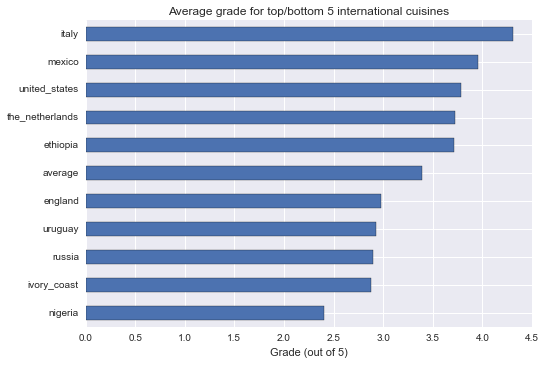

In [17]:
df = data
ave = df.mean().order(ascending = False)
# Dirty trick to remove the respondent ID column
new_ave = ave[1:41]
summary = new_ave.head(5)
mean = pd.Series(new_ave.mean(), index = ['average'])
summary = summary.append(mean)
summary = summary.append(new_ave.tail(5))
summary = summary.order(ascending = True)
summary.plot(kind = 'barh', title = 'Average grade for top/bottom 5 international cuisines').set_xlabel('Grade (out of 5)')

Care must be exercised when analysing these results. Indeed, since certain types of cuisines are less well known than others, one has to be make sure enough responses are logged so that the sample is statistically valid. In the case of Nigerian food, only five people out of 100 rated this cusine, a very poor statistical sample. Similarly, Ivory Coast  Uruguay, Ethiopia and the Netherlands only received 8, 14, 21 and 25 grades. Using an n > 30 criterion (see the Data Anlysis and Statistical Inference course on Coursera), we remove the above-mentioned countries and make a new figure below. Italian, Mexican and US cusines remain on top while English and Russian cusines can now claim the honor of being the worst in the world (and in a statistically sound manner!).

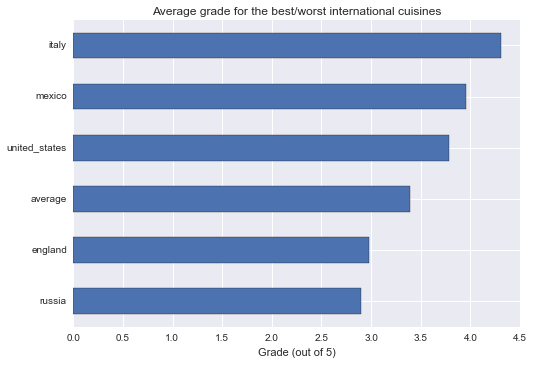

In [18]:
summary.drop(['the_netherlands', 'nigeria', 'ivory_coast', 'uruguay', 'ethiopia']).plot(kind = 'barh', title = 'Average grade for the best/worst international cuisines').set_xlabel('Grade (out of 5)')

Further data analysis can show some other interesting trends. For example, as shown in the figure below, people with an advanced level of knowledge of international cusines give sistematically larger average grades (3.94) than people with intermediate or novice knowledge levels (3.41 and 3.25, respectively). It could be that a higher knowledge of international cusine leads to an overall higher appreciation of it or, alternatively, that people who are more enthusiastic about food  are also more inclined to try international cuisines. Further data is necessary to explore this question.

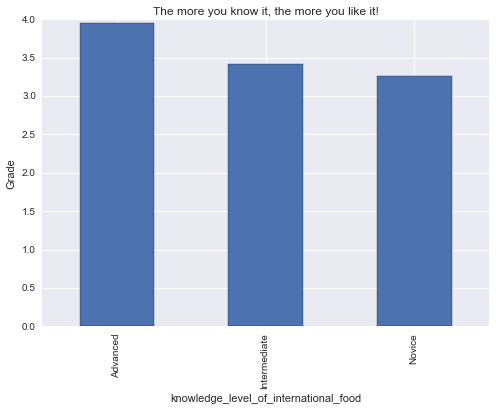

In [27]:
df = data
df = df.groupby(['knowledge_level_of_international_food','gender']).mean()
df = df.unstack(0)
df = df.stack(0)
df1 = df.loc['Male']
df2 = df.loc['Female']
new_df = (df1 + df2)/2
new_df = new_df.drop(('respondent_id'))
new_df.mean().plot(kind = 'bar', title = 'The more you know it, the more you like it!').set_ylabel('Grade')

Finally, we have tried to find any correlation between the knowledge of international food (or interest) with income/education. We did not find any clear trend, probably because of poor statistics. For instance, when one groups the interest in international food by the income level, each category can have as little as 1 or 0 responses. For similar reasons, we could not find any geographical correlation (e.g. do people on the West coast like more certain types of foods?) nor any gender correlation. Interesting, we did find that the number of male respondents (53) was much larger than that of female responders (38), an oddity since in the US there are more women than men (https://en.wikipedia.org/wiki/List_of_countries_by_sex_ratio). This could show that the sample was not properly randomized and could point out to some interesting unconscious gender bias. This is another point that merits further exploration.